<h1 style="color:red; text-align:center;">Covid Model SVM</h1>

In [1]:
import pandas as pd
import numpy as np

# data visualization library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [39]:
# Read the Data
dataset = pd.read_csv('E:\Skripsi\model_covid\Covid Dataset.csv')
dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [3]:
dataset.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [4]:
print(dataset.shape)

(5434, 21)


## Finding Missing Value

In [40]:
# create a table with data missing
missing_values = dataset.isnull().sum() # missing values

percent_missing = dataset.isnull().sum()/ dataset.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing ':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


## Checking unique value in dataset

In [5]:
print(dataset.nunique())

Breathing Problem                          2
Fever                                      2
Dry Cough                                  2
Sore throat                                2
Running Nose                               2
Asthma                                     2
Chronic Lung Disease                       2
Headache                                   2
Heart Disease                              2
Diabetes                                   2
Hyper Tension                              2
Fatigue                                    2
Gastrointestinal                           2
Abroad travel                              2
Contact with COVID Patient                 2
Attended Large Gathering                   2
Visited Public Exposed Places              2
Family working in Public Exposed Places    2
Wearing Masks                              1
Sanitization from Market                   1
COVID-19                                   2
dtype: int64


In [10]:
print(dataset[dataset['COVID-19'] == 'Yes'].count())

Breathing Problem                          4383
Fever                                      4383
Dry Cough                                  4383
Sore throat                                4383
Running Nose                               4383
Asthma                                     4383
Chronic Lung Disease                       4383
Headache                                   4383
Heart Disease                              4383
Diabetes                                   4383
Hyper Tension                              4383
Fatigue                                    4383
Gastrointestinal                           4383
Abroad travel                              4383
Contact with COVID Patient                 4383
Attended Large Gathering                   4383
Visited Public Exposed Places              4383
Family working in Public Exposed Places    4383
Wearing Masks                              4383
Sanitization from Market                   4383
COVID-19                                

In [11]:
print(dataset[dataset['COVID-19'] == 'No'].count())

Breathing Problem                          1051
Fever                                      1051
Dry Cough                                  1051
Sore throat                                1051
Running Nose                               1051
Asthma                                     1051
Chronic Lung Disease                       1051
Headache                                   1051
Heart Disease                              1051
Diabetes                                   1051
Hyper Tension                              1051
Fatigue                                    1051
Gastrointestinal                           1051
Abroad travel                              1051
Contact with COVID Patient                 1051
Attended Large Gathering                   1051
Visited Public Exposed Places              1051
Family working in Public Exposed Places    1051
Wearing Masks                              1051
Sanitization from Market                   1051
COVID-19                                

## Using Encoding to turn all the value into 1 and 0

In [13]:
# Encoding
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()

In [16]:
dataset['Breathing Problem']=e.fit_transform(dataset['Breathing Problem'])
dataset['Fever']=e.fit_transform(dataset['Fever'])
dataset['Dry Cough']=e.fit_transform(dataset['Dry Cough'])
dataset['Sore throat']=e.fit_transform(dataset['Sore throat'])
dataset['Running Nose']=e.fit_transform(dataset['Running Nose'])
dataset['Asthma']=e.fit_transform(dataset['Asthma'])
dataset['Chronic Lung Disease']=e.fit_transform(dataset['Chronic Lung Disease'])
dataset['Headache']=e.fit_transform(dataset['Headache'])
dataset['Heart Disease']=e.fit_transform(dataset['Heart Disease'])
dataset['Diabetes']=e.fit_transform(dataset['Diabetes'])
dataset['Hyper Tension']=e.fit_transform(dataset['Hyper Tension'])
dataset['Fatigue ']=e.fit_transform(dataset['Fatigue '])
dataset['Gastrointestinal ']=e.fit_transform(dataset['Gastrointestinal '])
dataset['Abroad travel']=e.fit_transform(dataset['Abroad travel'])
dataset['Contact with COVID Patient']=e.fit_transform(dataset['Contact with COVID Patient'])
dataset['Attended Large Gathering']=e.fit_transform(dataset['Attended Large Gathering'])
dataset['Visited Public Exposed Places']=e.fit_transform(dataset['Visited Public Exposed Places'])
dataset['Family working in Public Exposed Places']=e.fit_transform(dataset['Family working in Public Exposed Places'])
dataset['Wearing Masks']=e.fit_transform(dataset['Wearing Masks'])
dataset['Sanitization from Market']=e.fit_transform(dataset['Sanitization from Market'])
dataset['COVID-19']=e.fit_transform(dataset['COVID-19'])


In [18]:
dataset.head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
5,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,1,0,0,0,1,0,1,1,...,1,1,0,0,1,1,1,0,0,1
7,1,1,1,0,1,1,0,0,0,1,...,0,1,1,0,0,1,0,0,0,1
8,1,1,1,0,1,0,1,0,0,1,...,1,0,1,1,1,0,0,0,0,1
9,1,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

In [21]:
dataset.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [41]:
features = dataset.columns.tolist()
features.remove('COVID-19')
print(features)

['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market']


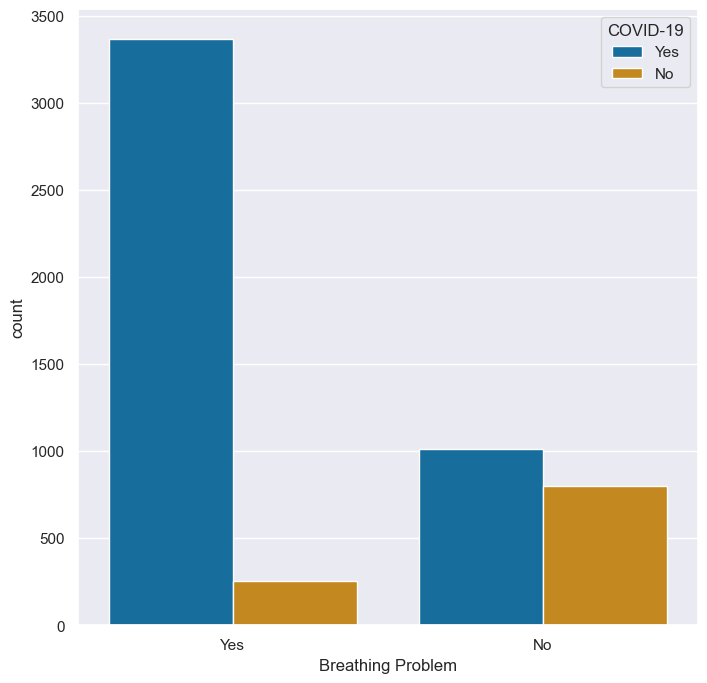

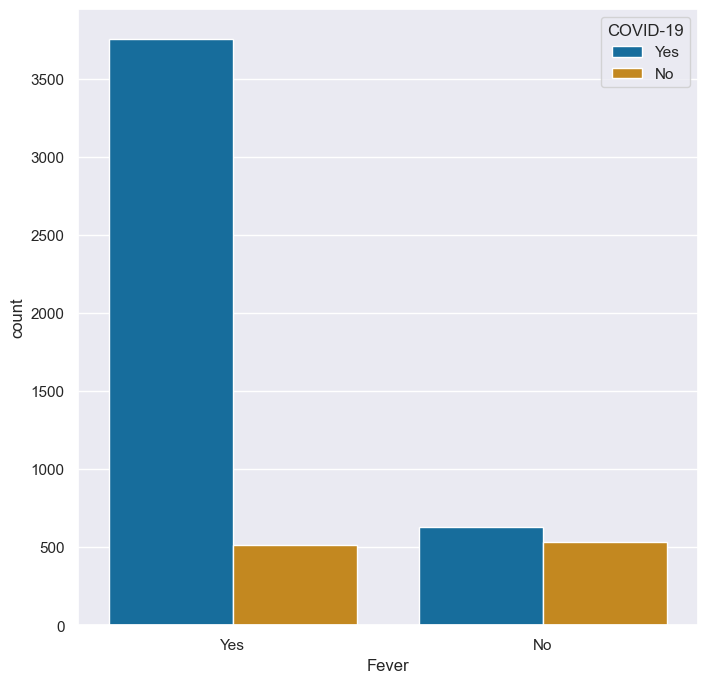

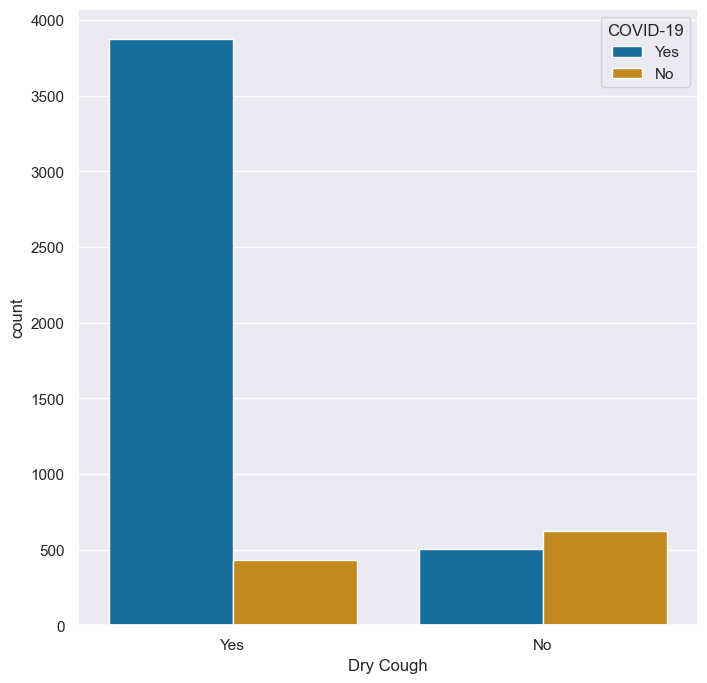

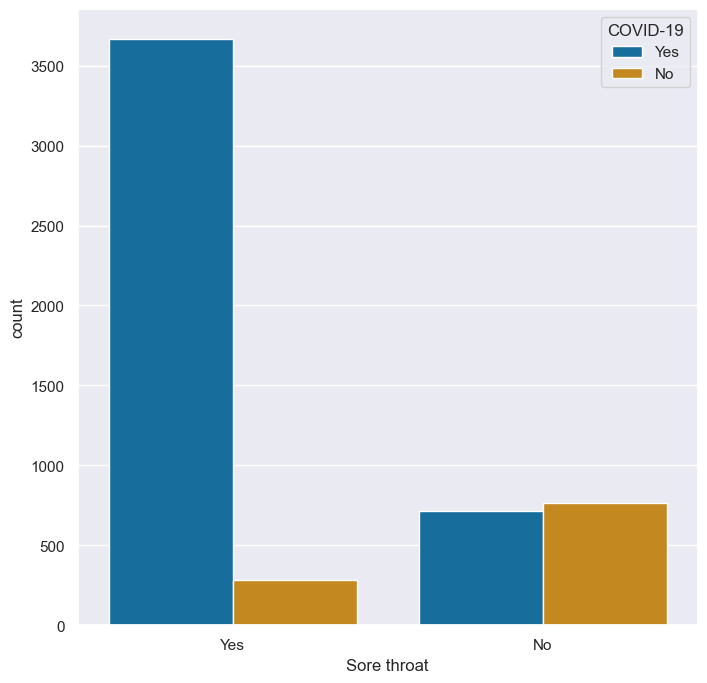

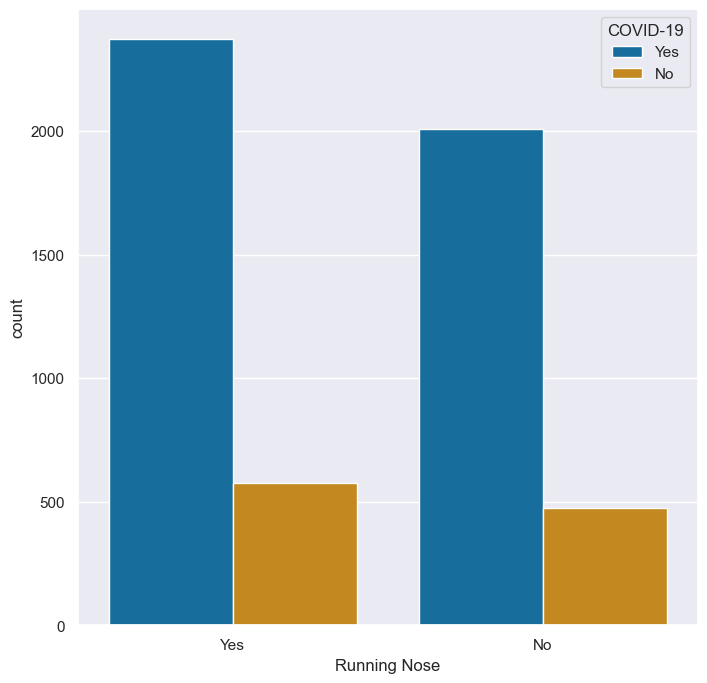

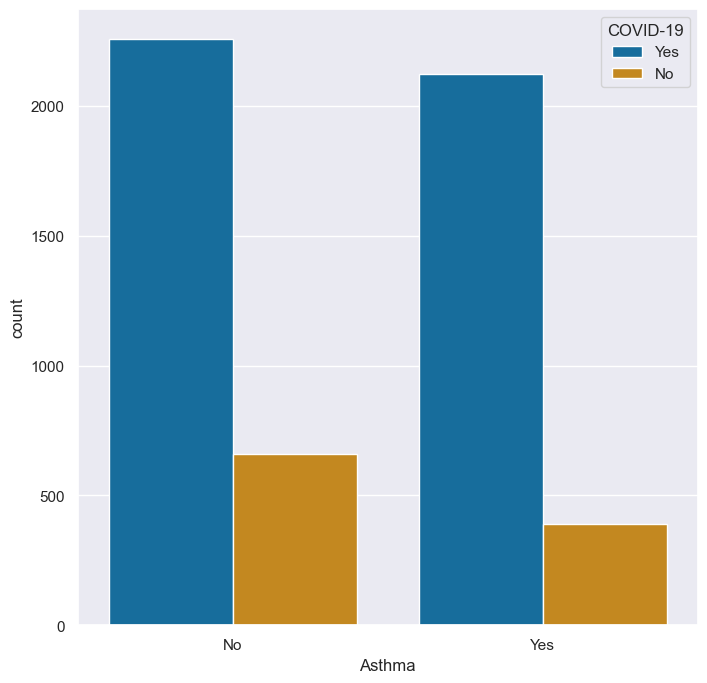

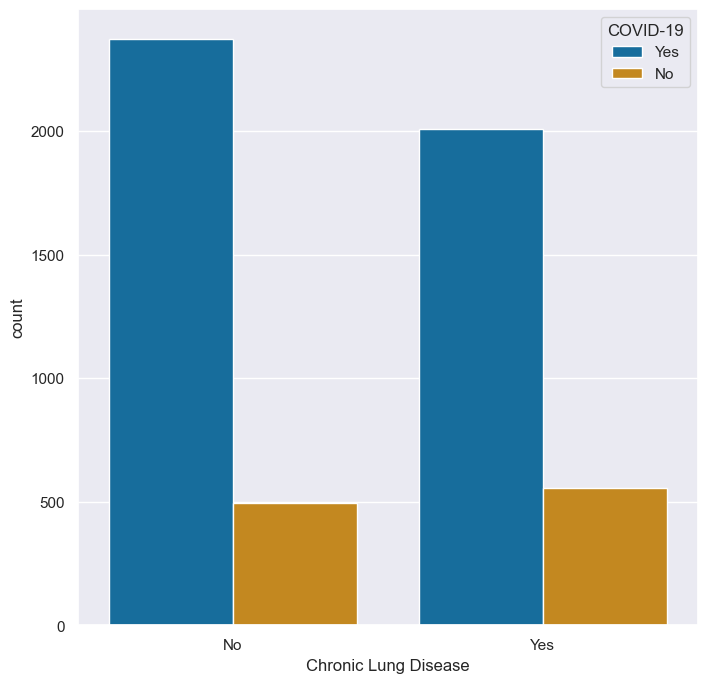

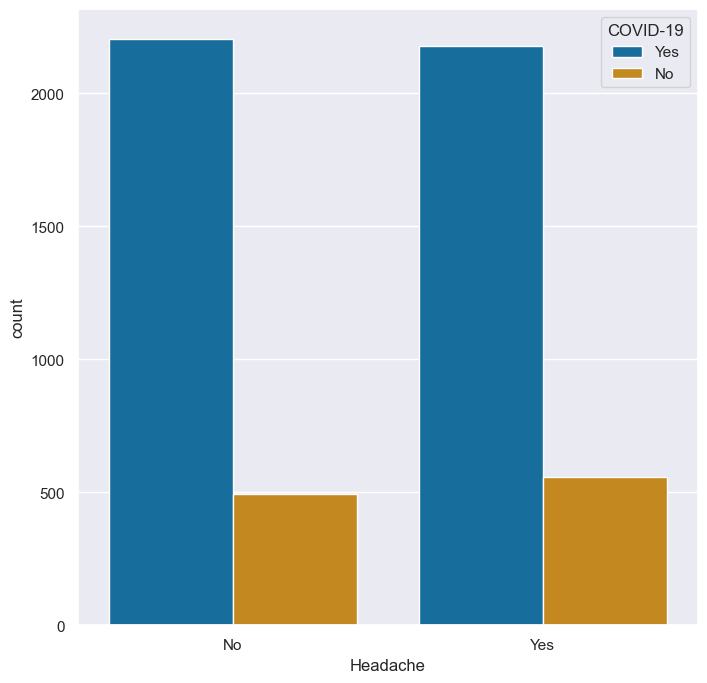

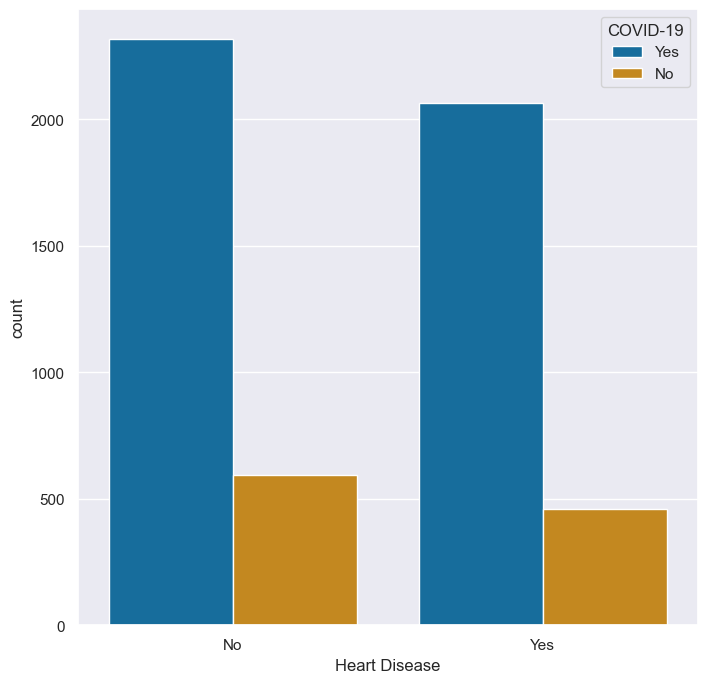

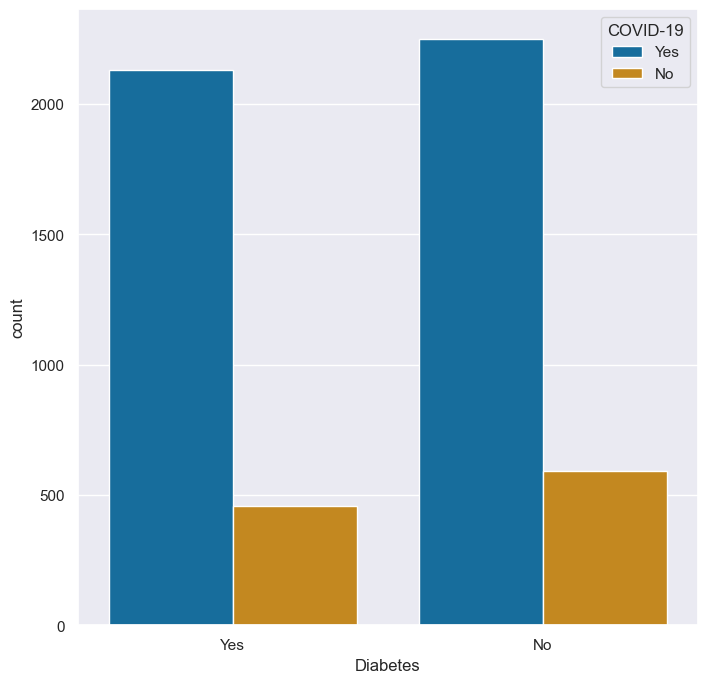

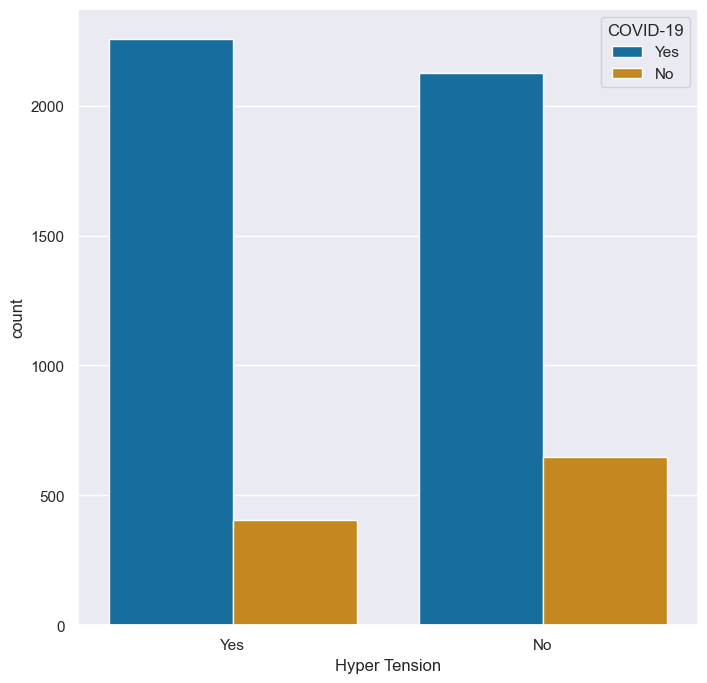

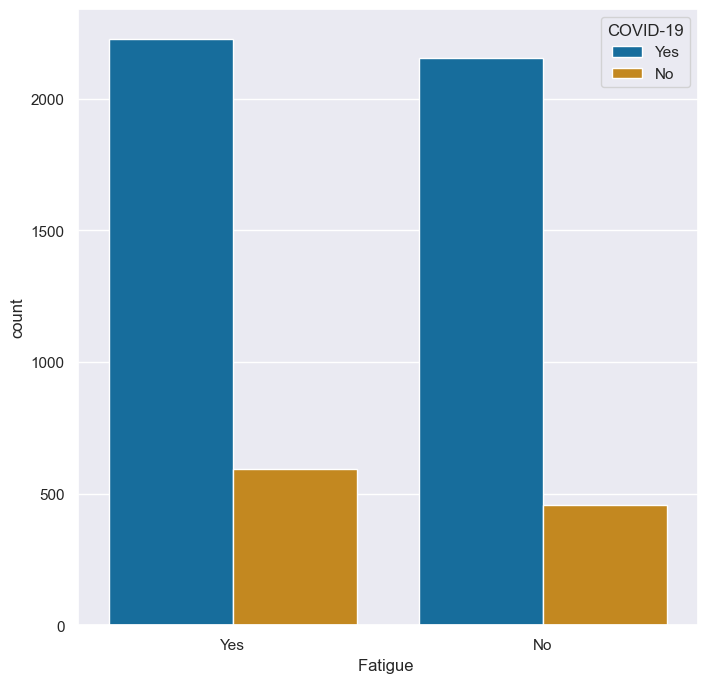

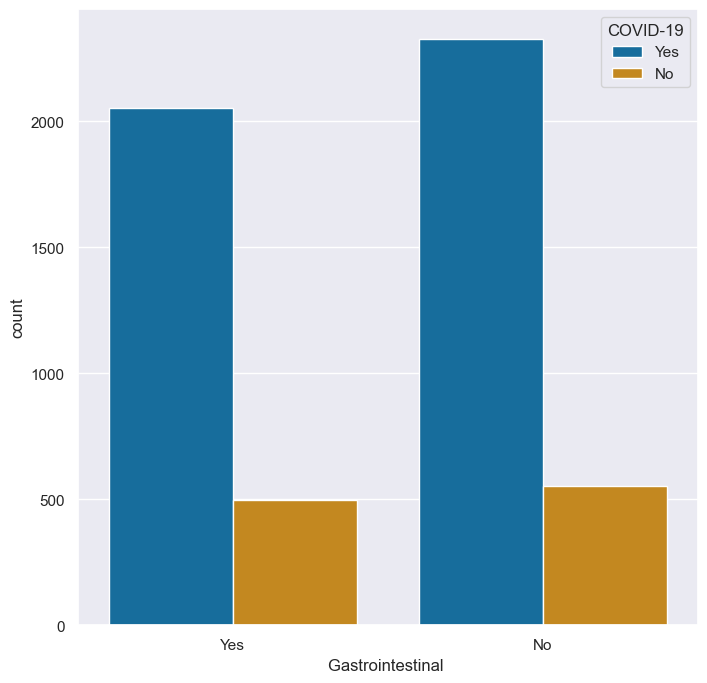

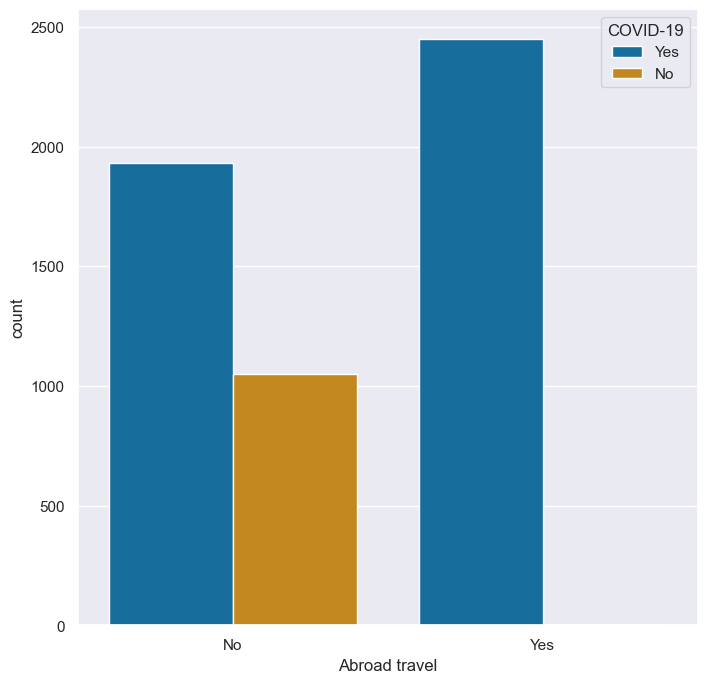

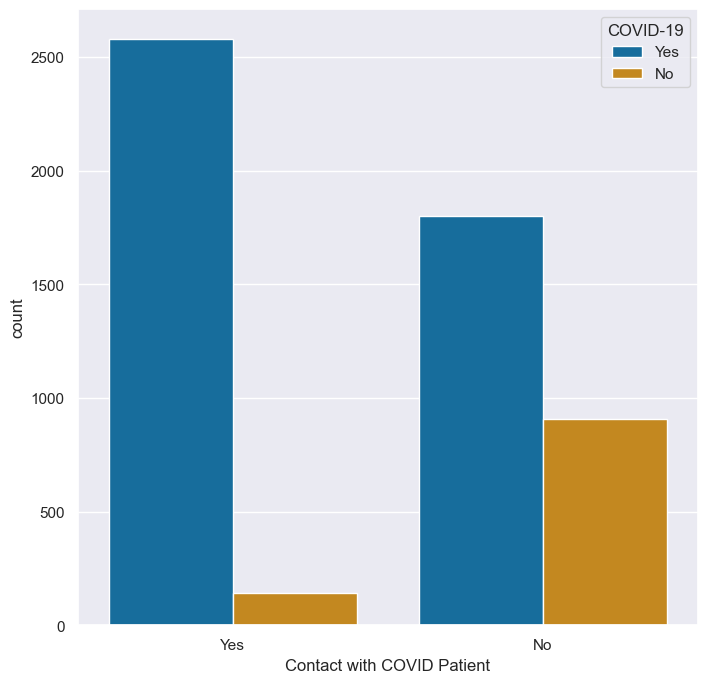

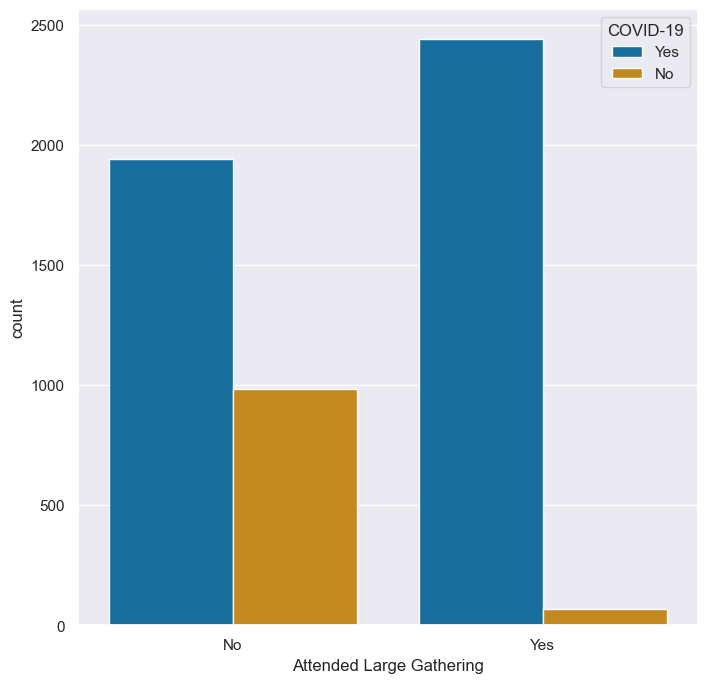

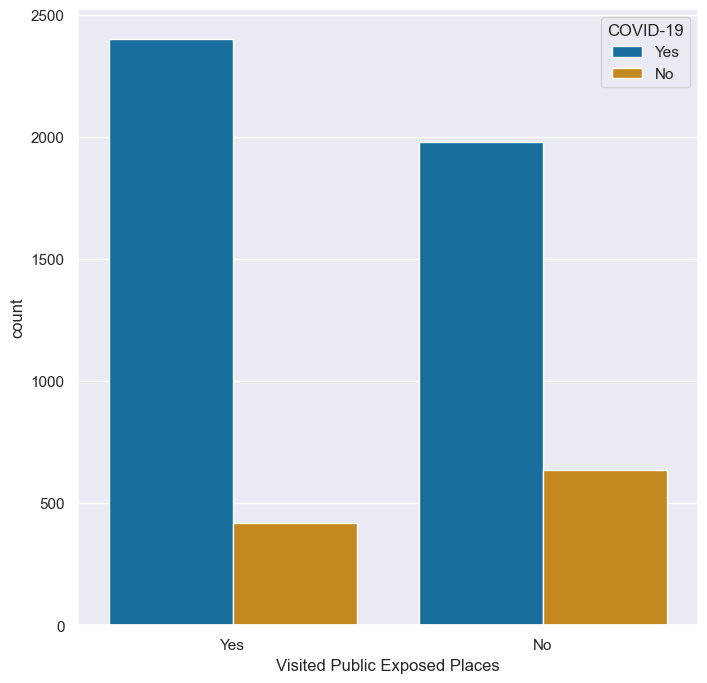

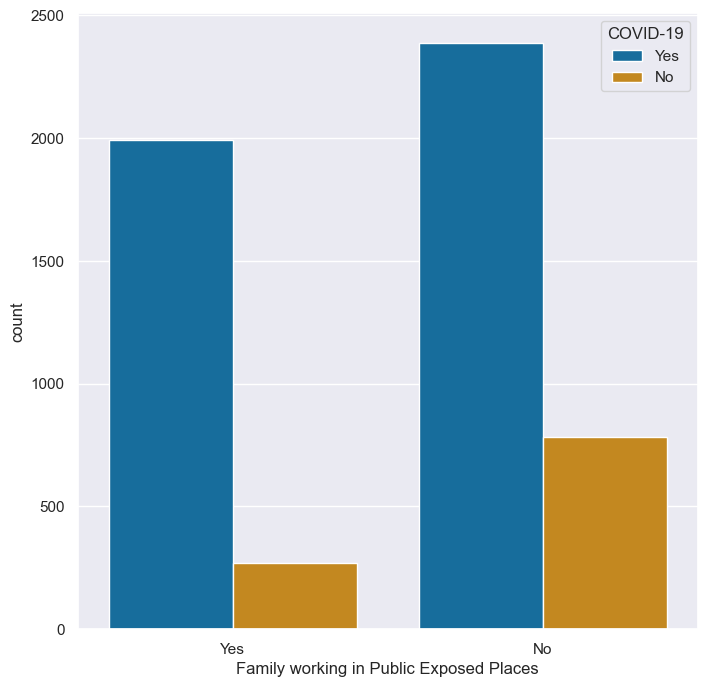

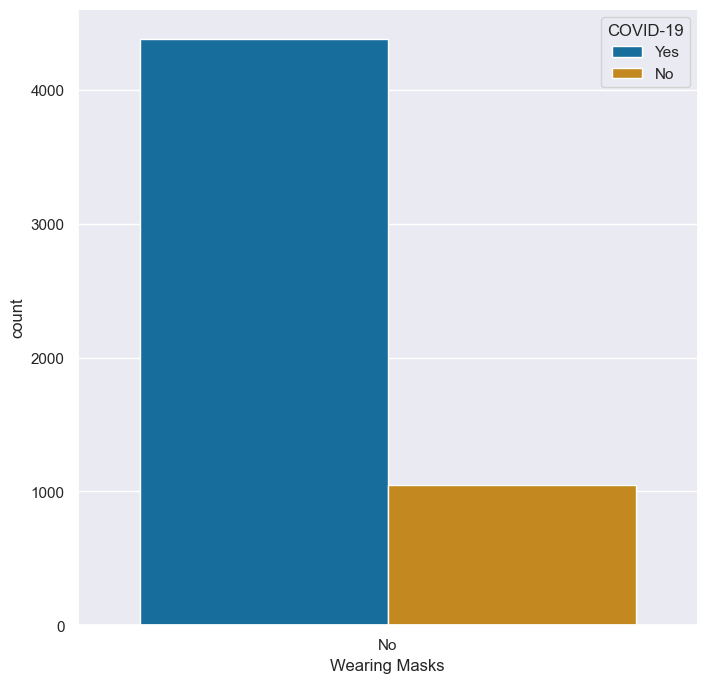

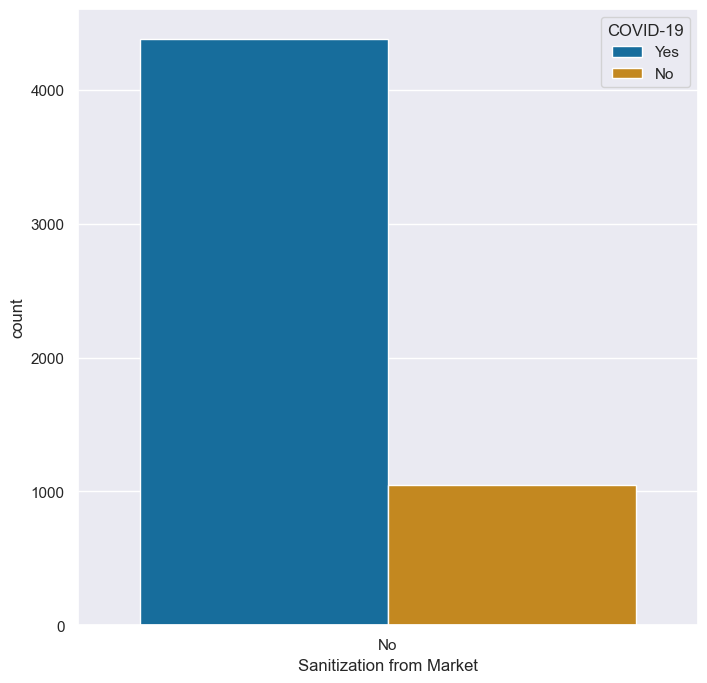

In [42]:
for feature in features:
    plt.figure()
    sns.countplot(x = feature, hue='COVID-19', data=dataset)

## Observations:
Breathing problem: Presence of Breathing problem ('Yes') does seem to have an impact among covid positive patience
Fever: Presence of Fever ('yes') is also very common among covid positive patients 3.Dry Cough: Covid positive people are mostly suffering with Dry Cough
Sore throat: Covid postive people are also suffering from Sore throat
Hypertension: Presence or absense of Hypertension doesn't seem to have any distinct impact
Abroad travel: Although postive patients are there who haven't had any abroad travel, but if a person is having abroad travel, there is almost full chance that the person will have covid-19
Contact with COVID Patients: people with contact with covid patients are having more chances of being covid positive
Attended Large Gathering: People who have attended large gatherings, are more probable of getting covid
visited public explosed places and family working in public exposed places, although have high positive rate, but doesn't seem to have any greater impact then those who are not exposed to such public places
Wearing mask and Sanitization from market has only one category i.e., No.

In [22]:
dataset=dataset.drop('Chronic Lung Disease', axis=1)
dataset=dataset.drop('Gastrointestinal ', axis=1)
dataset=dataset.drop('Wearing Masks', axis=1)
dataset=dataset.drop('Sanitization from Market', axis=1)

dataset.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,1,0,0,0,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1
2,1,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1
3,1,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1


In [23]:
print(dataset[dataset['COVID-19'] == 1].count())

Breathing Problem                          4383
Fever                                      4383
Dry Cough                                  4383
Sore throat                                4383
Running Nose                               4383
Asthma                                     4383
Headache                                   4383
Heart Disease                              4383
Diabetes                                   4383
Hyper Tension                              4383
Fatigue                                    4383
Abroad travel                              4383
Contact with COVID Patient                 4383
Attended Large Gathering                   4383
Visited Public Exposed Places              4383
Family working in Public Exposed Places    4383
COVID-19                                   4383
dtype: int64


In [24]:
print(dataset[dataset['COVID-19'] == 0].count())

Breathing Problem                          1051
Fever                                      1051
Dry Cough                                  1051
Sore throat                                1051
Running Nose                               1051
Asthma                                     1051
Headache                                   1051
Heart Disease                              1051
Diabetes                                   1051
Hyper Tension                              1051
Fatigue                                    1051
Abroad travel                              1051
Contact with COVID Patient                 1051
Attended Large Gathering                   1051
Visited Public Exposed Places              1051
Family working in Public Exposed Places    1051
COVID-19                                   1051
dtype: int64


## Changing the data type of every single column into category

In [25]:
dataset = dataset.astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Breathing Problem                        5434 non-null   category
 1   Fever                                    5434 non-null   category
 2   Dry Cough                                5434 non-null   category
 3   Sore throat                              5434 non-null   category
 4   Running Nose                             5434 non-null   category
 5   Asthma                                   5434 non-null   category
 6   Headache                                 5434 non-null   category
 7   Heart Disease                            5434 non-null   category
 8   Diabetes                                 5434 non-null   category
 9   Hyper Tension                            5434 non-null   category
 10  Fatigue                             

In [27]:
X = dataset.iloc[:, :11]
y = dataset['COVID-19']

## Splitting data into Training set and Testing set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Making the data balanced

In [30]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
print("Before undersampling: ", Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({1: 3070, 0: 733})
After undersampling:  Counter({0: 733, 1: 733})


In [32]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

## Defining the svm SVC as model

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(X_train, y_train)

SVC()

In [34]:
covid_model = model.predict(X_test)

## Print the accuracy score

In [35]:
accuracy_score(y_test, covid_model)

0.9724095646842428

## Saving model as a pickle

In [38]:
import pickle

pickle.dump(model, open("covid_svm.sav", "wb"))
pickle.dump(sc, open("scaler.sav", "wb"))